https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/

# Imports

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [3]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from IPython.display import display

In [4]:
PATH = 'data/nyc-taxi/'

# Load training and test data

The entire dataset has about 55,423,857 rows

In [5]:
types = {'fare_amount': 'float32',
         'pickup_longitude': 'float32',
         'pickup_latitude': 'float32',
         'dropoff_longitude': 'float32',
         'dropoff_latitude': 'float32',
         'passenger_count': 'uint8'}

# Columns to keep (basically discarding the 'key' column) - thanks to the suggestion by mhviraf
cols_train = ['fare_amount', 'pickup_datetime', 'pickup_longitude', 
        'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

# No 'fare_amount'
cols_test = ['pickup_datetime', 'pickup_longitude', 
        'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [6]:
df_list = [] # list to hold the batch dataframe
chunksize = 10_000_000 # 10 million rows at one go. Or try 10 million
total_chunk = 55423857 // chunksize + 1

print(f'Chunk size: {chunksize:,}\nTotal chunks required: {total_chunk}')

Chunk size: 10,000,000
Total chunks required: 6


In [7]:
%%time
i=0
for df_chunk in pd.read_csv(f'{PATH}train.csv', parse_dates=["pickup_datetime"], usecols=cols_train,
                         infer_datetime_format=True, dtype=types, chunksize=chunksize):
    
    i = i+1
    # Each chunk is a corresponding dataframe
    print(f'DataFrame Chunk {i}/{total_chunk}')
    
    # Can process each chunk of dataframe here
    # feature_engineer(), remove_outliers(), fit(), predict()
    
    # Alternatively, append the chunk to list and merge all
    df_list.append(df_chunk) 

DataFrame Chunk 1/6
DataFrame Chunk 2/6
DataFrame Chunk 3/6
DataFrame Chunk 4/6
DataFrame Chunk 5/6
DataFrame Chunk 6/6
Wall time: 4min 55s


In [8]:
# Merge all dataframes into one dataframe
train_df = pd.concat(df_list)

In [9]:
del df_list

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 7 columns):
fare_amount          float32
pickup_datetime      datetime64[ns]
pickup_longitude     float32
pickup_latitude      float32
dropoff_longitude    float32
dropoff_latitude     float32
passenger_count      uint8
dtypes: datetime64[ns](1), float32(5), uint8(1)
memory usage: 1.5 GB


In [11]:
display(train_df.head())
display(train_df.tail())

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:16,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:42,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00,-73.968094,40.768009,-73.956657,40.783764,1


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
55423851,14.0,2014-03-15 03:28:00,-74.005272,40.740028,-73.963280,40.762554,1
55423852,4.2,2009-03-24 20:46:20,-73.957787,40.765530,-73.951637,40.773960,1
55423853,14.1,2011-04-02 22:04:24,-73.970505,40.752323,-73.960541,40.797340,1
55423854,28.9,2011-10-26 05:57:51,-73.980904,40.764629,-73.870605,40.773964,1
55423855,7.5,2014-12-12 11:33:00,-73.969719,40.797668,-73.970886,40.783314,1


In [12]:
%%time
os.makedirs('tmp', exist_ok=True)
train_df.to_feather('tmp/taxi-train-raw')

Wall time: 18.9 s


In [50]:
%%time
train_df = pd.read_feather('tmp/taxi-train-raw')

Wall time: 21.8 s


In [6]:
test_df = pd.read_csv(f'{PATH}test.csv', parse_dates=["pickup_datetime"], usecols=cols_test,
                         infer_datetime_format=True, dtype=types)

In [7]:
test_df.to_feather('tmp/taxi-test-raw')

# Quick EDA

In [15]:
display(train_df.head())
display(train_df.tail())

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:16,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:42,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00,-73.968094,40.768009,-73.956657,40.783764,1


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
55423851,14.0,2014-03-15 03:28:00,-74.005272,40.740028,-73.963280,40.762554,1
55423852,4.2,2009-03-24 20:46:20,-73.957787,40.765530,-73.951637,40.773960,1
55423853,14.1,2011-04-02 22:04:24,-73.970505,40.752323,-73.960541,40.797340,1
55423854,28.9,2011-10-26 05:57:51,-73.980904,40.764629,-73.870605,40.773964,1
55423855,7.5,2014-12-12 11:33:00,-73.969719,40.797668,-73.970886,40.783314,1


In [16]:
display(test_df.head())
display(test_df.tail())

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12,-73.966049,40.789776,-73.988564,40.744427,1


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
9909,2015-05-10 12:37:51,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19,-73.985573,40.735432,-73.939178,40.801731,6
9913,2015-01-18 14:06:23,-73.988022,40.754070,-74.000282,40.759220,6


In [17]:
DataFrameSummary(train_df).summary()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.54239e+07,NaN,5.54239e+07,5.54239e+07,5.54235e+07,5.54235e+07,5.54239e+07
mean,11.345,NaN,-72.5097,39.9198,-72.5111,39.9207,1.68538
std,20.7108,NaN,12.8489,9.64235,12.7822,9.63335,1.32766
min,-300,NaN,-3442.06,-3492.26,-3442.02,-3547.89,0
25%,6,NaN,-73.9921,40.7349,-73.9914,40.734,1
50%,8.5,NaN,-73.9818,40.7527,-73.9801,40.7532,1
75%,12.5,NaN,-73.9671,40.7671,-73.9637,40.7681,2
max,93963.4,NaN,3457.63,3408.79,3457.62,3537.13,208
counts,55423856,55423856,55423856,55423856,55423480,55423480,55423856
uniques,9405,26173536,98330,116546,114629,134778,15


In [18]:
DataFrameSummary(test_df).summary()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,NaN,9914,9914,9914,9914,9914
mean,NaN,-73.9747,40.751,-73.9737,40.7517,1.67127
std,NaN,0.042774,0.0335415,0.0390719,0.0354352,1.27875
min,NaN,-74.2522,40.5731,-74.2632,40.569,1
25%,NaN,-73.9925,40.7361,-73.9912,40.7353,1
50%,NaN,-73.9823,40.7531,-73.98,40.7541,1
75%,NaN,-73.968,40.7671,-73.9641,40.7688,2
max,NaN,-72.9865,41.7096,-72.991,41.6967,6
counts,9914,9914,9914,9914,9914,9914
uniques,1753,5894,7857,6174,8124,6


# Remove missing values

In [52]:
train_df.isnull().sum() 

fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64

In [53]:
test_df.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [54]:
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))

Old size: 55423856
New size: 55423480


# Longitude, latitude and travel distance

## Add travel vector and simple distance

In [55]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

In [56]:
def add_simple_distance(df):
#     df['simple_distance'] = np.sqrt(df.abs_diff_longitude ** 2 + df.abs_diff_latitude ** 2)
    df['simple_distance'] = df.abs_diff_longitude  + df.abs_diff_latitude

In [57]:
add_travel_vector_features(train_df)
add_travel_vector_features(test_df)

add_simple_distance(train_df)
add_simple_distance(test_df)

In [58]:
DataFrameSummary(train_df).summary()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,simple_distance
count,5.54235e+07,NaN,5.54235e+07,5.54235e+07,5.54235e+07,5.54235e+07,5.54235e+07,5.54235e+07,5.54235e+07,5.54235e+07
mean,11.345,NaN,-72.5099,39.9198,-72.5112,39.9207,1.68539,0.199236,0.122812,0.322049
std,20.7109,NaN,12.8488,9.64232,12.7822,9.63335,1.32766,9.44166,9.40297,16.5363
min,-300,NaN,-3442.06,-3492.26,-3442.02,-3547.89,0,0,0,0
25%,6,NaN,-73.9921,40.7349,-73.9914,40.734,1,0.00580597,0.00658417,0.0158195
50%,8.5,NaN,-73.9818,40.7527,-73.9801,40.7532,1,0.0124359,0.0138588,0.0276337
75%,12.5,NaN,-73.9671,40.7671,-73.9637,40.7681,2,0.0237122,0.0269356,0.0503426
max,93963.4,NaN,3457.63,3408.79,3457.62,3537.13,208,6812.94,6818.56,11314.8
counts,55423480,55423480,55423480,55423480,55423480,55423480,55423480,55423480,55423480,55423480
uniques,9391,26173267,98330,116546,114629,134778,15,91903,117299,172192


In [59]:
DataFrameSummary(test_df).summary()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,simple_distance
count,NaN,9914,9914,9914,9914,9914,9914,9914,9914
mean,NaN,-73.9747,40.751,-73.9737,40.7517,1.67127,0.0233484,0.0221326,0.045481
std,NaN,0.042774,0.0335415,0.0390719,0.0354352,1.27875,0.0367193,0.0255887,0.0559748
min,NaN,-74.2522,40.5731,-74.2632,40.569,1,0,0,0
25%,NaN,-73.9925,40.7361,-73.9912,40.7353,1,0.00635529,0.00727844,0.0170059
50%,NaN,-73.9823,40.7531,-73.98,40.7541,1,0.0131226,0.0147152,0.02911
75%,NaN,-73.968,40.7671,-73.9641,40.7688,2,0.0245628,0.0282612,0.0529604
max,NaN,-72.9865,41.7096,-72.991,41.6967,6,0.849174,0.633213,1.47997
counts,9914,9914,9914,9914,9914,9914,9914,9914,9914
uniques,1753,5894,7857,6174,8124,6,4896,6761,7793


## Bounding box for training data (looks absurd)

In [60]:
plongmin, plongmax = train_df.pickup_longitude.min(),train_df.pickup_longitude.max()
dlongmin, dlongmax = train_df.dropoff_longitude.min(),train_df.dropoff_longitude.max()
platmin, platmax = train_df.pickup_latitude.min(),train_df.pickup_latitude.max()
dlatmin, dlatmax = train_df.dropoff_latitude.min(),train_df.dropoff_latitude.max()

In [61]:
print("Bounding box for pickup")
print(f"({plongmin},{platmin},{plongmax},{platmax})")

Bounding box for pickup
(-3442.0595703125,-3492.263671875,3457.625732421875,3408.78955078125)


In [62]:
print(f"Bounding box for dropoff")
print(f"({dlongmin},{dlatmin},{dlongmax},{dlatmax})")

Bounding box for dropoff
(-3442.024658203125,-3547.88671875,3457.622314453125,3537.132568359375)


## Bounding box for test data

The latitude of New York City, NY, USA is **40.730610**, and the longitude is **-73.935242**. 

In [64]:
plongmin, plongmax = test_df.pickup_longitude.min(),test_df.pickup_longitude.max()
dlongmin, dlongmax = test_df.dropoff_longitude.min(),test_df.dropoff_longitude.max()
platmin, platmax = test_df.pickup_latitude.min(),test_df.pickup_latitude.max()
dlatmin, dlatmax = test_df.dropoff_latitude.min(),test_df.dropoff_latitude.max()

In [65]:
print(f"pickup longitude min and max:\t {plongmin},  {plongmax}")
print(f"dropoff longitude min and max:\t {dlongmin},  {dlongmax}")
print()
print(f"pickup latitude min and max:\t  {platmin},  {platmax}")
print(f"dropoff longitude min and max:\t  {dlatmin},  {dlatmax}")

pickup longitude min and max:	 -74.25218963623047,  -72.98653411865234
dropoff longitude min and max:	 -74.26324462890625,  -72.990966796875

pickup latitude min and max:	  40.573143005371094,  41.709556579589844
dropoff longitude min and max:	  40.568973541259766,  41.69668197631836


In [66]:
print("Bounding box for pickup")
print(f"({plongmin},{platmin},{plongmax},{platmax})")

Bounding box for pickup
(-74.25218963623047,40.573143005371094,-72.98653411865234,41.709556579589844)


In [67]:
print(f"Bounding box for pickup")
print(f"({dlongmin},{dlatmin},{dlongmax},{dlatmax})")

Bounding box for pickup
(-74.26324462890625,40.568973541259766,-72.990966796875,41.69668197631836)


In [68]:
step=0.02

longmin_limit = min(plongmin,dlongmin)-step
latmin_limit = min(platmin,dlatmin)-step 
latmax_limit = max(platmax,dlatmax)+step
longmax_limit = max(plongmax, dlongmax)+step

longmin_limit, latmin_limit, longmax_limit, latmax_limit

(-74.28324462890625, 40.54897354125976, -72.96653411865235, 41.72955657958985)

### Comparisons of bounding boxes

Black box is bounding box with step 0.3, blue boxes are pickup and dropoff bounding box

1,170,362 outside range

http://bboxfinder.com/#40.268974,-74.563245,42.009557,-72.686534 



![bbox 0.3](./tmp/bbox-0.3.jpg)

Black box is bounding box with step 0.02, blue boxes are pickup and dropoff bounding box

1,182,186 outside range

http://bboxfinder.com/#40.548974,-74.283245,41.729557,-72.966534

![bbox 0.02](./tmp/bbox-0.02.jpg)

### Exclude training data for those outside bounding box

In [69]:
is_outside_plong = ~train_df.pickup_longitude.between(plongmin,plongmax)
is_outside_plat = ~train_df.pickup_latitude.between(platmin,platmax)

is_outside_dlong = ~train_df.dropoff_longitude.between(dlongmin,dlongmax)
is_outside_dlat = ~train_df.dropoff_latitude.between(dlatmin,dlatmax)

is_outside_plong.sum(), is_outside_plat.sum(), is_outside_dlong.sum(), is_outside_dlat.sum()

(1108744, 1104470, 1104873, 1105212)

In [70]:
is_outside_range = is_outside_plong | is_outside_plat | is_outside_dlong | is_outside_dlat
is_outside_range.sum()

1186729

In [71]:
print('Old size: %d' % len(train_df))
train_df = train_df[~is_outside_range]
print('New size: %d' % len(train_df))

Old size: 55423480
New size: 54236751


## Checkpoint 1

In [73]:
# reset_index after removing rows, in order to be able to save to feather
train_df.reset_index(drop=True, inplace=True)

In [74]:
%%time
train_df.to_feather('tmp/taxi-train-v3-chkpt1')

Wall time: 27.8 s


In [75]:
%%time
test_df.to_feather('tmp/taxi-test-v3-chkpt1')

Wall time: 77.7 ms


In [127]:
%%time
train_df = pd.read_feather('tmp/taxi-train-v3-chkpt1')

Wall time: 4.49 s


In [128]:
%%time
test_df = pd.read_feather('tmp/taxi-test-v3-chkpt1')

Wall time: 2 ms


## Distance

In [129]:
test_df.simple_distance.min(), test_df.abs_diff_latitude.min(),  test_df.abs_diff_longitude.min()

(0.0, 0.0, 0.0)

In [130]:
# zero travel distance - cancellation? minimum payment such as booking fee?

(len(test_df[test_df.simple_distance == 0]), 
len(test_df[test_df.abs_diff_latitude == 0]),
len(test_df[test_df.abs_diff_longitude == 0]))

(85, 85, 87)

In [131]:
train_df.simple_distance.min(), train_df.abs_diff_latitude.min(), train_df.abs_diff_longitude.min()

(0.0, 0.0, 0.0)

In [132]:
(len(train_df[train_df.simple_distance == 0]), 
len(train_df[train_df.abs_diff_latitude == 0]),
len(train_df[train_df.abs_diff_longitude == 0]))

(582610, 598703, 612504)

In [133]:
# check fare_amount for zero travel distance from training data
train_df[train_df.simple_distance == 0].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,simple_distance
count,582610.000000,582610.000000,582610.000000,582610.000000,582610.000000,582610.000000,582610.0,582610.0,582610.0
mean,11.204736,-73.942711,40.761200,-73.942711,40.761200,1.666954,0.0,0.0,0.0
std,15.759149,0.135910,0.100125,0.135910,0.100125,1.327103,0.0,0.0,0.0
min,-100.000000,-74.251274,40.573189,-74.251274,40.573189,0.000000,0.0,0.0,0.0
25%,4.900000,-73.990555,40.733704,-73.990555,40.733704,1.000000,0.0,0.0,0.0
50%,6.900000,-73.975594,40.752289,-73.975594,40.752289,1.000000,0.0,0.0,0.0
75%,10.500000,-73.947929,40.767838,-73.947929,40.767838,2.000000,0.0,0.0,0.0
max,3130.300049,-73.001656,41.639359,-73.001656,41.639359,208.000000,0.0,0.0,0.0


In [134]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,simple_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273,0.023348,0.022133,0.045481
std,0.042774,0.033541,0.039072,0.035435,1.278747,0.036719,0.025589,0.055975
min,-74.252190,40.573143,-74.263245,40.568974,1.000000,0.000000,0.000000,0.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000,0.006355,0.007278,0.017006
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,0.013123,0.014715,0.029110
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,0.024563,0.028261,0.052960
max,-72.986534,41.709557,-72.990967,41.696682,6.000000,0.849174,0.633213,1.479969


In [135]:
test_df.simple_distance.max(), test_df.abs_diff_latitude.max(), test_df.abs_diff_longitude.max()

(1.479969, 0.63321304, 0.8491745)

In [136]:
train_df.simple_distance.max(), train_df.abs_diff_latitude.max(), train_df.abs_diff_longitude.max()

(1.7942276, 0.9609375, 1.1900101)

In [137]:
step = 0.05

is_outside_abs_diff_longitude = train_df.abs_diff_longitude>test_df.abs_diff_longitude.max()+step*2
is_outside_abs_diff_latitude = train_df.abs_diff_latitude>test_df.abs_diff_latitude.max()+step
is_outside_simple_distance = train_df.simple_distance>test_df.simple_distance.max()+step

is_outside_abs_diff_longitude.sum(),is_outside_abs_diff_latitude.sum(), is_outside_simple_distance.sum()

(82, 708, 362)

In [138]:
is_outside_extreme_range = is_outside_abs_diff_longitude | is_outside_abs_diff_latitude | is_outside_simple_distance
is_outside_extreme_range.sum()

961

In [139]:
print('Old size: %d' % len(train_df))
train_df = train_df[~is_outside_extreme_range]
print('New size: %d' % len(train_df))

Old size: 54236751
New size: 54235790


# Passenger Count

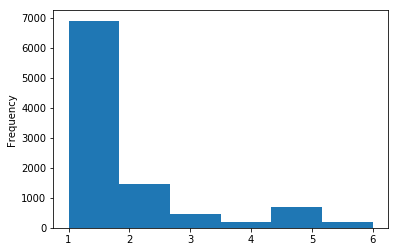

In [140]:
test_df.passenger_count.plot(kind='hist',bins=6)

In [141]:
test_df.passenger_count.value_counts()

1    6914
2    1474
5     696
3     447
4     206
6     177
Name: passenger_count, dtype: int64

In [142]:
train_df.passenger_count.value_counts().sort_index()

0        190837
1      37506534
2       8010756
3       2382230
4       1155248
5       3840018
6       1150103
7            13
8             7
9            20
129           2
208          22
Name: passenger_count, dtype: int64

In [143]:
# number rows with passenger = 0 or more than 6
len(train_df[~(train_df.passenger_count.between(1,6))])

190901

In [144]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.passenger_count.between(1,6))]
print('New size: %d' % len(train_df))

Old size: 54235790
New size: 54044889


## Checkpoint 2

In [146]:
# reset_index after removing rows, in order to be able to save to feather
train_df.reset_index(drop=True, inplace=True)

In [147]:
%%time
train_df.to_feather('tmp/taxi-train-v3-chkpt2')

Wall time: 29.7 s


In [148]:
%%time
test_df.to_feather('tmp/taxi-test-v3-chkpt2')

Wall time: 85.1 ms


In [149]:
%%time
train_df = pd.read_feather('tmp/taxi-train-v3-chkpt2')

Wall time: 2.11 s


In [150]:
%%time
test_df = pd.read_feather('tmp/taxi-test-v3-chkpt2')

Wall time: 2 ms


# Fare Amount

In [151]:
train_df.fare_amount.median(), train_df.fare_amount.mean()

(8.5, 11.323553)

In [152]:
(train_df.fare_amount.quantile(0.99), train_df.fare_amount.quantile(0.999),
 train_df.fare_amount.quantile(0.9999),train_df.fare_amount.quantile(0.99999))

(52.0, 77.5, 133.0, 222.0)

In [153]:
(len(train_df[(train_df.fare_amount>train_df.fare_amount.quantile(0.99))]),
len(train_df[(train_df.fare_amount>train_df.fare_amount.quantile(0.999))]),
 len(train_df[(train_df.fare_amount>train_df.fare_amount.quantile(0.9999))]),
len(train_df[(train_df.fare_amount>train_df.fare_amount.quantile(0.99999))]))

(536873, 53804, 5374, 538)

In [154]:
len(train_df[(train_df.fare_amount==0)]) # those who paid nothing

1106

In [155]:
len(train_df[(train_df.fare_amount<0)])  # those who had refund?

2205

In [178]:
fare_amount_threshold = 100

In [179]:
len(train_df[~((train_df.fare_amount>0) & (train_df.fare_amount<fare_amount_threshold))])

20663

In [180]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.fare_amount>0) & (train_df.fare_amount<fare_amount_threshold)] 
print('New size: %d' % len(train_df))

Old size: 54044889
New size: 54024226


In [181]:
# check fare_amount for zero travel distance from training data
train_df[train_df.simple_distance == 0].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,simple_distance
count,579631.000000,579631.000000,579631.000000,579631.000000,579631.000000,579631.000000,579631.0,579631.0,579631.0
mean,10.720553,-73.942970,40.760948,-73.942970,40.760948,1.669781,0.0,0.0,0.0
std,12.322309,0.135223,0.099855,0.135223,0.099855,1.300547,0.0,0.0,0.0
min,0.010000,-74.251274,40.573189,-74.251274,40.573189,1.000000,0.0,0.0,0.0
25%,4.900000,-73.990517,40.733730,-73.990517,40.733730,1.000000,0.0,0.0,0.0
50%,6.500000,-73.975609,40.752270,-73.975609,40.752270,1.000000,0.0,0.0,0.0
75%,10.500000,-73.948143,40.767742,-73.948143,40.767742,2.000000,0.0,0.0,0.0
max,99.989998,-73.001656,41.639359,-73.001656,41.639359,6.000000,0.0,0.0,0.0


In [182]:
test_df[test_df.simple_distance == 0].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,simple_distance
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.0,85.0
mean,-73.922089,40.781349,-73.922089,40.781349,1.741176,0.0,0.0,0.0
std,0.181695,0.134858,0.181695,0.134858,1.337668,0.0,0.0,0.0
min,-74.047394,40.622555,-74.047394,40.622555,1.000000,0.0,0.0,0.0
25%,-73.983925,40.742584,-73.983925,40.742584,1.000000,0.0,0.0,0.0
50%,-73.970085,40.754883,-73.970085,40.754883,1.000000,0.0,0.0,0.0
75%,-73.951820,40.772038,-73.951820,40.772038,2.000000,0.0,0.0,0.0
max,-73.137390,41.366138,-73.137390,41.366138,6.000000,0.0,0.0,0.0


- There are 85 cases  of zero travel distance in test set. 
- There are 579,631 cases of zero travel distance in training set.
- Zero distance can also mean travel and come back to the same spot. In any case it's ambiguous case
- Fare amount in training set range from 0.01 to 99.98 as we have set limits to min and max fare previously
- Ignore this for now

## Checkpoint 3

In [183]:
# reset_index after removing rows, in order to be able to save to feather
train_df.reset_index(drop=True, inplace=True)

In [184]:
%%time
train_df.to_feather('tmp/taxi-train-v3-chkpt3')

Wall time: 31.3 s


In [185]:
%%time
test_df.to_feather('tmp/taxi-test-v3-chkpt3')

Wall time: 955 ms


In [231]:
%%time
train_df = pd.read_feather('tmp/taxi-train-v3-chkpt3')

Wall time: 50 s


In [232]:
%%time
test_df = pd.read_feather('tmp/taxi-test-v3-chkpt3')

Wall time: 479 ms


# Date Time

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54024226 entries, 0 to 54024225
Data columns (total 10 columns):
fare_amount           float32
pickup_datetime       datetime64[ns]
pickup_longitude      float32
pickup_latitude       float32
dropoff_longitude     float32
dropoff_latitude      float32
passenger_count       uint8
abs_diff_longitude    float32
abs_diff_latitude     float32
simple_distance       float32
dtypes: datetime64[ns](1), float32(8), uint8(1)
memory usage: 2.1 GB


In [9]:
%%time
add_datepart(train_df, 'pickup_datetime', time=True)

Wall time: 1min 13s


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54024226 entries, 0 to 54024225
Data columns (total 25 columns):
fare_amount                        float32
pickup_longitude                   float32
pickup_latitude                    float32
dropoff_longitude                  float32
dropoff_latitude                   float32
passenger_count                    uint8
abs_diff_longitude                 float32
abs_diff_latitude                  float32
simple_distance                    float32
pickup_datetimeYear                int64
pickup_datetimeMonth               int64
pickup_datetimeWeek                int64
pickup_datetimeDay                 int64
pickup_datetimeDayofweek           int64
pickup_datetimeDayofyear           int64
pickup_datetimeIs_month_end        bool
pickup_datetimeIs_month_start      bool
pickup_datetimeIs_quarter_end      bool
pickup_datetimeIs_quarter_start    bool
pickup_datetimeIs_year_end         bool
pickup_datetimeIs_year_start       bool
pickup_datetim

In [11]:
cols_to_drop = [
    'pickup_datetimeIs_month_start',
    'pickup_datetimeIs_month_end',    
    'pickup_datetimeIs_quarter_start',
    'pickup_datetimeIs_quarter_end',
    'pickup_datetimeIs_year_start',
    'pickup_datetimeIs_year_end',  
    'pickup_datetimeSecond',
    'pickup_datetimeElapsed'
]

In [12]:
train_df.drop(cols_to_drop, axis='columns', inplace=True)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54024226 entries, 0 to 54024225
Data columns (total 17 columns):
fare_amount                 float32
pickup_longitude            float32
pickup_latitude             float32
dropoff_longitude           float32
dropoff_latitude            float32
passenger_count             uint8
abs_diff_longitude          float32
abs_diff_latitude           float32
simple_distance             float32
pickup_datetimeYear         int64
pickup_datetimeMonth        int64
pickup_datetimeWeek         int64
pickup_datetimeDay          int64
pickup_datetimeDayofweek    int64
pickup_datetimeDayofyear    int64
pickup_datetimeHour         int64
pickup_datetimeMinute       int64
dtypes: float32(8), int64(8), uint8(1)
memory usage: 4.9 GB


In [14]:
def convert_datetimetype(df):
    df.pickup_datetimeYear = (df.pickup_datetimeYear-2000).astype('uint8')   
    df.pickup_datetimeMonth = df.pickup_datetimeMonth.astype('uint8') 
    df.pickup_datetimeDay = df.pickup_datetimeDay.astype('uint8')   
    df.pickup_datetimeWeek = df.pickup_datetimeWeek.astype('uint8')    
    df.pickup_datetimeHour = df.pickup_datetimeHour.astype('uint8')   
    df.pickup_datetimeMinute = df.pickup_datetimeMinute.astype('uint8')    
    df.pickup_datetimeDayofweek = df.pickup_datetimeDayofweek.astype('uint8')                 
    df.pickup_datetimeDayofyear = df.pickup_datetimeDayofyear.astype('uint16')   

In [15]:
convert_datetimetype(train_df)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54024226 entries, 0 to 54024225
Data columns (total 17 columns):
fare_amount                 float32
pickup_longitude            float32
pickup_latitude             float32
dropoff_longitude           float32
dropoff_latitude            float32
passenger_count             uint8
abs_diff_longitude          float32
abs_diff_latitude           float32
simple_distance             float32
pickup_datetimeYear         uint8
pickup_datetimeMonth        uint8
pickup_datetimeWeek         uint8
pickup_datetimeDay          uint8
pickup_datetimeDayofweek    uint8
pickup_datetimeDayofyear    uint16
pickup_datetimeHour         uint8
pickup_datetimeMinute       uint8
dtypes: float32(8), uint16(1), uint8(8)
memory usage: 2.1 GB


## Repeat on test dataframe

In [17]:
add_datepart(test_df, 'pickup_datetime', time=True)

In [18]:
test_df.drop(cols_to_drop, axis='columns', inplace=True)

In [19]:
convert_datetimetype(test_df)

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 16 columns):
pickup_longitude            9914 non-null float32
pickup_latitude             9914 non-null float32
dropoff_longitude           9914 non-null float32
dropoff_latitude            9914 non-null float32
passenger_count             9914 non-null uint8
abs_diff_longitude          9914 non-null float32
abs_diff_latitude           9914 non-null float32
simple_distance             9914 non-null float32
pickup_datetimeYear         9914 non-null uint8
pickup_datetimeMonth        9914 non-null uint8
pickup_datetimeWeek         9914 non-null uint8
pickup_datetimeDay          9914 non-null uint8
pickup_datetimeDayofweek    9914 non-null uint8
pickup_datetimeDayofyear    9914 non-null uint16
pickup_datetimeHour         9914 non-null uint8
pickup_datetimeMinute       9914 non-null uint8
dtypes: float32(7), uint16(1), uint8(8)
memory usage: 368.0 KB


## Checkpoint 4

In [21]:
%%time
train_df.to_feather('tmp/taxi-train-v3-chkpt4')

Wall time: 36.1 s


In [22]:
%%time
test_df.to_feather('tmp/taxi-test-v3-chkpt4')

Wall time: 932 ms


# Load Clean

In [34]:
%%time
train_df = pd.read_feather('tmp/taxi-train-v3-chkpt4')

Wall time: 29.1 s


In [35]:
%%time
test_df = pd.read_feather('tmp/taxi-test-v3-chkpt4')

Wall time: 514 ms


# Find nearest neighbour

In [36]:
y_train = train_df.pop('fare_amount')

In [37]:
# faster iterations with a dataframe subset

X_train = train_df[['pickup_longitude',
                  'pickup_latitude', 
                  'dropoff_longitude',
                  'dropoff_latitude',
                  'pickup_datetimeYear',  
                  'pickup_datetimeWeek',  
                  'pickup_datetimeHour']].copy()

X_test = test_df[['pickup_longitude',
                 'pickup_latitude', 
                 'dropoff_longitude',
                 'dropoff_latitude',
                 'pickup_datetimeYear',    
                 'pickup_datetimeWeek',   
                 'pickup_datetimeHour']].copy()

In [38]:
y_train.shape, X_train.shape, X_test.shape

((54024226,), (54024226, 7), (9914, 7))

In [39]:
%%time 

list_neighbours = []
test_data_length = len(X_test)

thres_long = 0.0001
thres_lat = 0.0001
gps_not_found = []
dt_not_found = []

print(f"Pickup and dropoff proximity about {thres_long*111000} meters")

for i in range(test_data_length):
    
    if (i%500==0): 
        set_neighbours = set(list_neighbours)
        print(f"{(i+1):04}/{test_data_length} with {len(set_neighbours)}")

    X_sub = X_train
    
    # same year, same hour, within few weeks apart (before or after, cap at year start, year end)
    X_sub = X_sub[(X_sub.pickup_datetimeHour == X_test.iloc[i].pickup_datetimeHour)]  
    X_sub = X_sub[(X_sub.pickup_datetimeYear == X_test.iloc[i].pickup_datetimeYear)]
#     X_sub = X_sub[(abs(X_sub.pickup_datetimeWeek - X_test.iloc[i].pickup_datetimeWeek) < 26)] 
    
    # similar locations
    X_sub = X_sub[(abs(X_sub.pickup_longitude - X_test.iloc[i].pickup_longitude) < thres_long)]     
    X_sub = X_sub[(abs(X_sub.pickup_latitude - X_test.iloc[i].pickup_latitude) < thres_lat)] 
    X_sub = X_sub[(abs(X_sub.dropoff_longitude- X_test.iloc[i].dropoff_longitude) < thres_long)]
    X_sub = X_sub[(abs(X_sub.dropoff_latitude - X_test.iloc[i].dropoff_latitude) < thres_lat)]

    list_neighbours = list_neighbours + list(X_sub.index.values)
    
#     print(f'{i+1} {len(X_sub)}')
#     print(list_neighbours)

set_neighbours = set(list_neighbours)
print(f"{(i+1):04}/{test_data_length} with {len(set_neighbours)}")

Pickup and dropoff proximity about 11.1 meters
0001/9914 with 0
0501/9914 with 7
1001/9914 with 11
1501/9914 with 24
2001/9914 with 25
2501/9914 with 27
3001/9914 with 368
3501/9914 with 373
4001/9914 with 375
4501/9914 with 377
5001/9914 with 383
5501/9914 with 385
6001/9914 with 615
6501/9914 with 620
7001/9914 with 1336
7501/9914 with 1377
8001/9914 with 1381
8501/9914 with 1843
9001/9914 with 1847
9501/9914 with 1889
9914/9914 with 1895
Wall time: 44min 6s


# Export

In [25]:
import csv

In [26]:
def list_to_csv(list_val, filename):
    with open(filename, "w") as f:
        writer = csv.writer(f, lineterminator='\n')
        for val in list_val:
            writer.writerow([val])    

In [27]:
# preserve order
def remove_dup(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

In [28]:
def csv_to_list(filename): 
    df = pd.read_csv(filename, header=None)
    return list(df[0])

In [41]:
list_before = list_neighbours
len(list_before)

1895

In [42]:
list_neighbours = remove_dup(list_neighbours)
len(list_neighbours)

1895

In [43]:
assert set(list_neighbours).issubset(list_before)

In [44]:
list_to_csv( list_neighbours, 'tmp/v3_neighbours_05.csv')   

# Neighbours Record

# Load list from csv

In [292]:
new_list=csv_to_list('tmp/v3_neighbours_02.csv')

# Visualization

In [ ]:
train_df['fare']=y_train

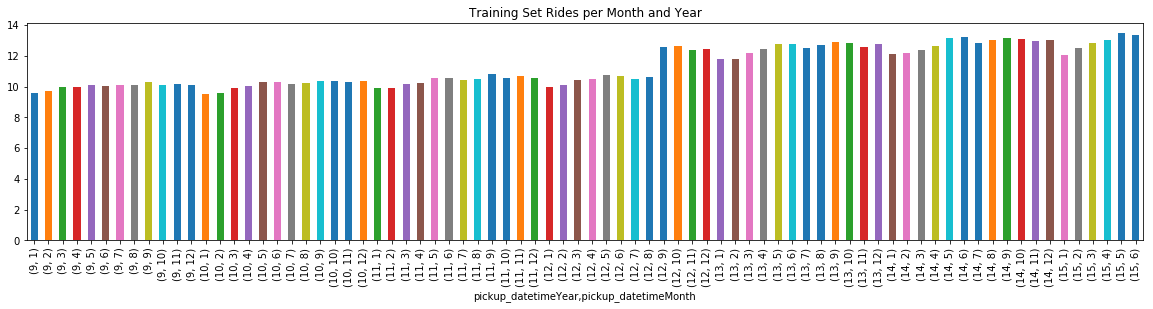

In [47]:
plt.figure(figsize=(20, 4))
train_df.fare.groupby([train_df.pickup_datetimeYear, train_df.pickup_datetimeMonth]).mean().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

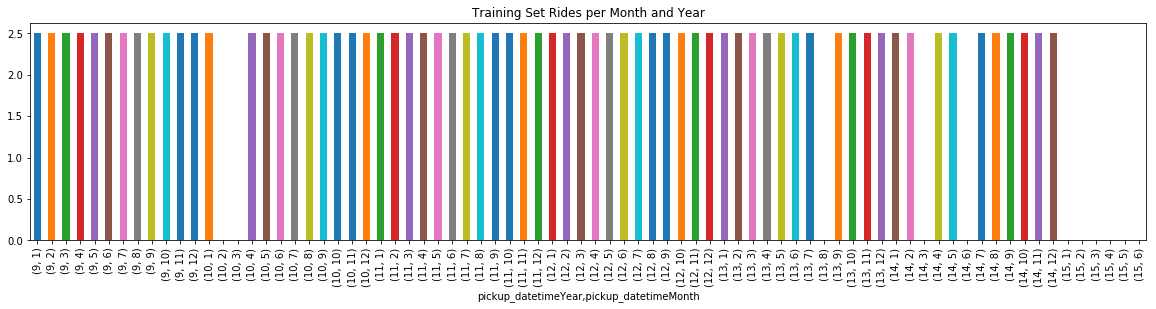

In [48]:
plt.figure(figsize=(20, 4))
train_df.fare.groupby([train_df.pickup_datetimeYear, train_df.pickup_datetimeMonth]).min().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

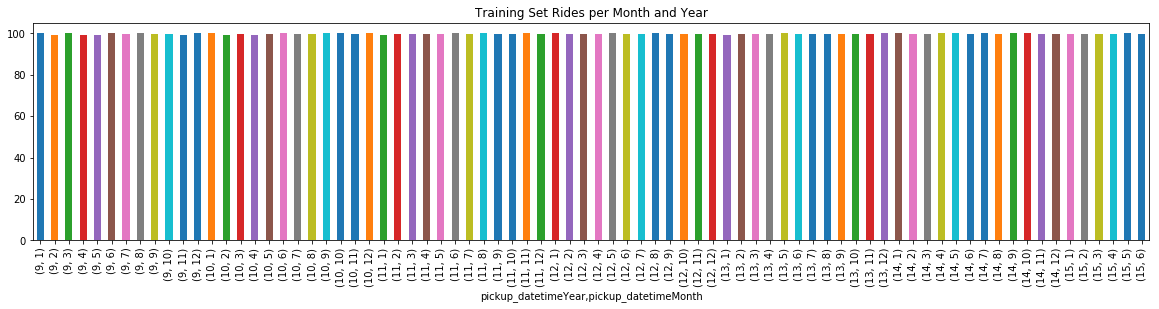

In [49]:
plt.figure(figsize=(20, 4))
train_df.fare.groupby([train_df.pickup_datetimeYear, train_df.pickup_datetimeMonth]).max().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

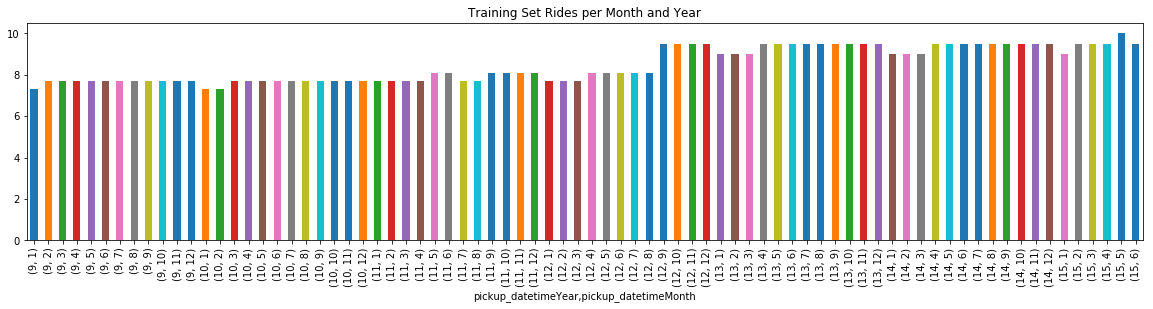

In [50]:
plt.figure(figsize=(20, 4))
train_df.fare.groupby([train_df.pickup_datetimeYear, train_df.pickup_datetimeMonth]).median().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

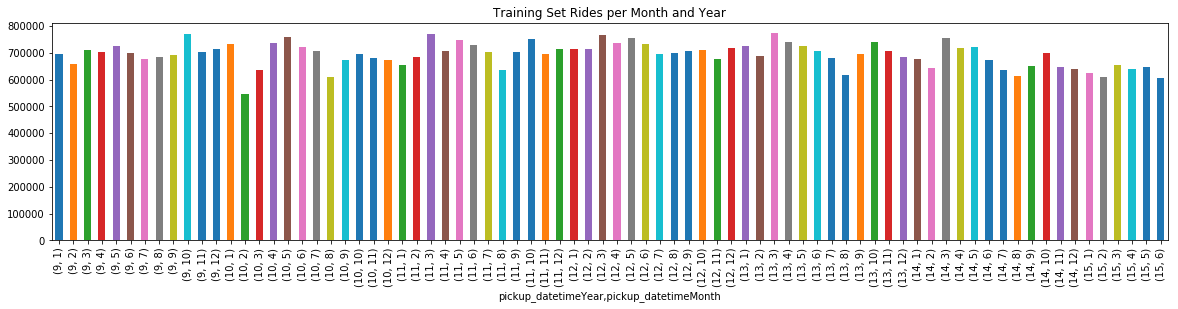

In [244]:
plt.figure(figsize=(20, 4))
train_df.simple_distance.groupby([train_df.pickup_datetimeYear, train_df.pickup_datetimeMonth]).count().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

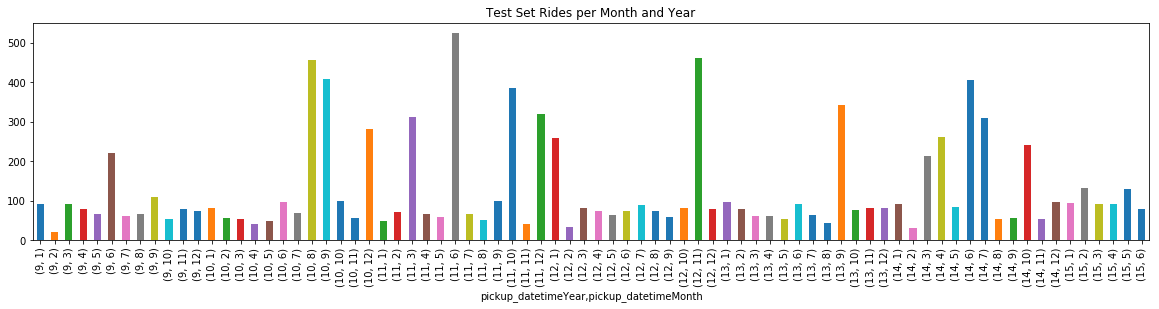

In [245]:
plt.figure(figsize=(20, 4))
test_df.simple_distance.groupby([test_df.pickup_datetimeYear, test_df.pickup_datetimeMonth]).count().plot(kind="bar")
plt.title('Test Set Rides per Month and Year')
plt.show()

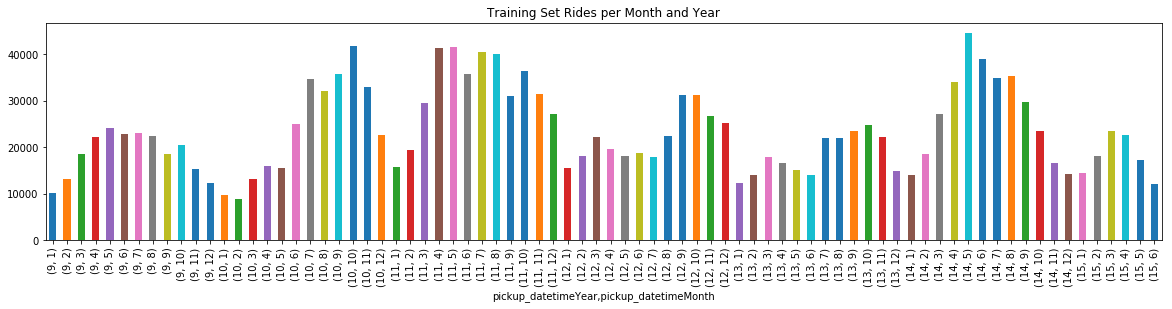

In [13]:
# v3_neighbours_01
new_list=csv_to_list('tmp/v3_neighbours_01.csv')
trimmed_df = train_df.iloc[new_list].copy()

plt.figure(figsize=(20, 4))
trimmed_df.simple_distance.groupby([trimmed_df.pickup_datetimeYear, trimmed_df.pickup_datetimeMonth]).count().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

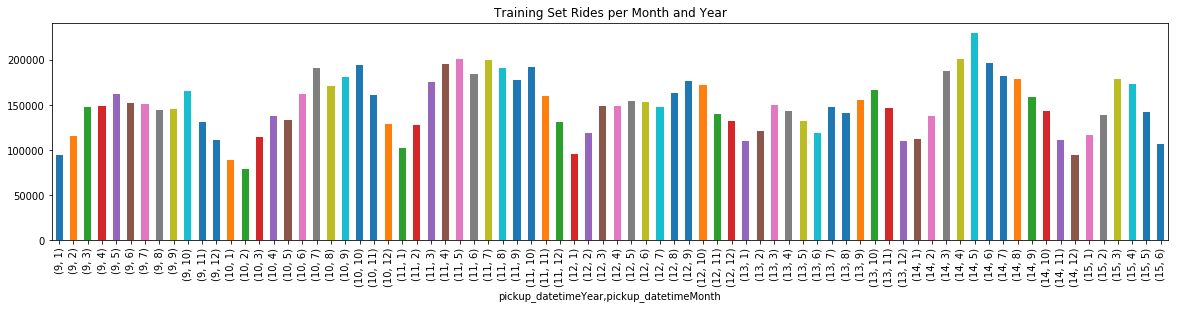

In [14]:
# v3_neighbours_02
new_list=csv_to_list('tmp/v3_neighbours_02.csv')
trimmed_df = train_df.iloc[new_list].copy()

plt.figure(figsize=(20, 4))
trimmed_df.simple_distance.groupby([trimmed_df.pickup_datetimeYear, trimmed_df.pickup_datetimeMonth]).count().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

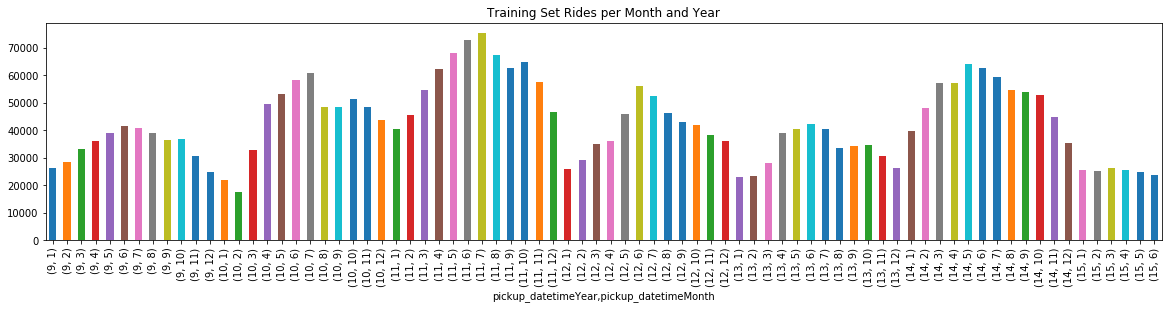

In [15]:
# v3_neighbours_03
new_list=csv_to_list('tmp/v3_neighbours_03.csv')
trimmed_df = train_df.iloc[new_list].copy()

plt.figure(figsize=(20, 4))
trimmed_df.simple_distance.groupby([trimmed_df.pickup_datetimeYear, trimmed_df.pickup_datetimeMonth]).count().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

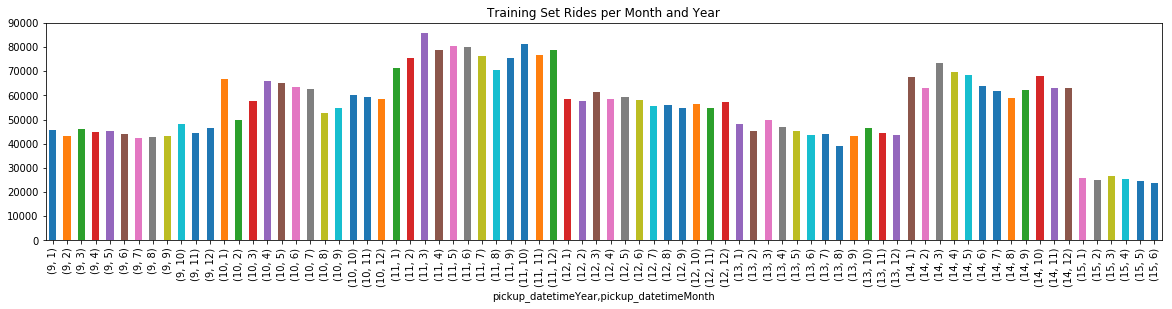

In [40]:
# v3_neighbours_03
new_list=csv_to_list('tmp/v3_neighbours_04.csv')
trimmed_df = train_df.iloc[new_list].copy()

plt.figure(figsize=(20, 4))
trimmed_df.simple_distance.groupby([trimmed_df.pickup_datetimeYear, trimmed_df.pickup_datetimeMonth]).count().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

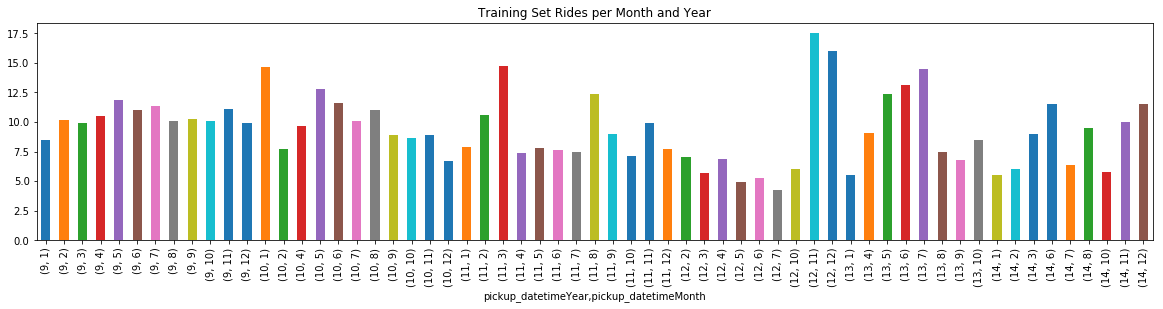

In [46]:
train_df['fare']=y_train


# v3_neighbours_05
new_list=csv_to_list('tmp/v3_neighbours_05.csv')
trimmed_df = train_df.iloc[new_list].copy()

plt.figure(figsize=(20, 4))
trimmed_df.fare.groupby([trimmed_df.pickup_datetimeYear, trimmed_df.pickup_datetimeMonth]).mean().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

# Compare Test vs Training Data

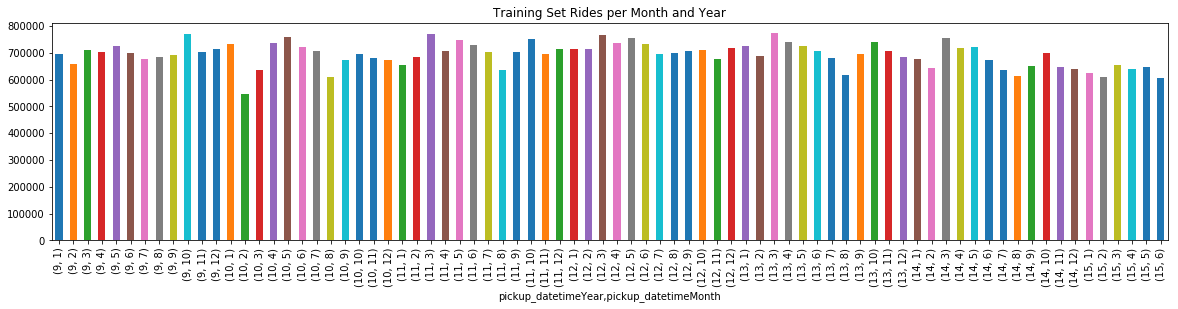

In [244]:
plt.figure(figsize=(20, 4))
train_df.simple_distance.groupby([train_df.pickup_datetimeYear, train_df.pickup_datetimeMonth]).count().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

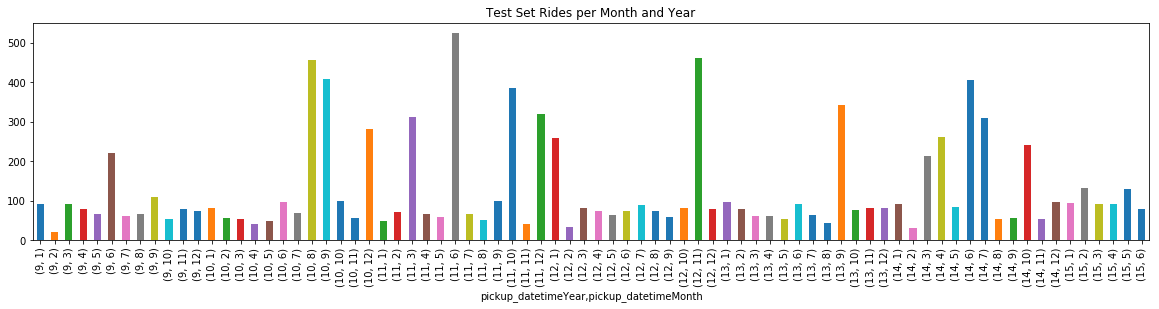

In [245]:
plt.figure(figsize=(20, 4))
test_df.simple_distance.groupby([test_df.pickup_datetimeYear, test_df.pickup_datetimeMonth]).count().plot(kind="bar")
plt.title('Test Set Rides per Month and Year')
plt.show()

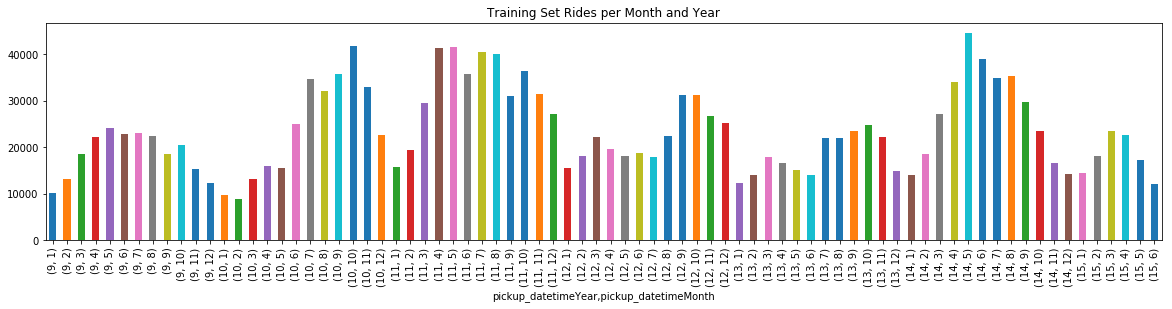

In [13]:
# v3_neighbours_01
new_list=csv_to_list('tmp/v3_neighbours_01.csv')
trimmed_df = train_df.iloc[new_list].copy()

plt.figure(figsize=(20, 4))
trimmed_df.simple_distance.groupby([trimmed_df.pickup_datetimeYear, trimmed_df.pickup_datetimeMonth]).count().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

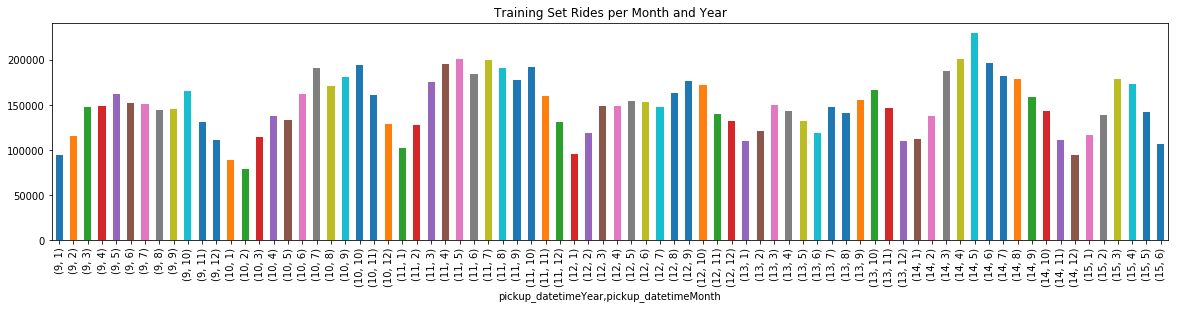

In [14]:
# v3_neighbours_02
new_list=csv_to_list('tmp/v3_neighbours_02.csv')
trimmed_df = train_df.iloc[new_list].copy()

plt.figure(figsize=(20, 4))
trimmed_df.simple_distance.groupby([trimmed_df.pickup_datetimeYear, trimmed_df.pickup_datetimeMonth]).count().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

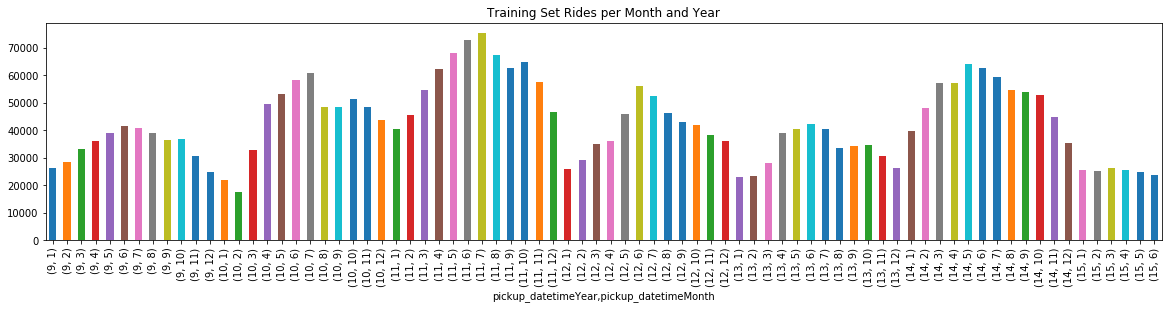

In [15]:
# v3_neighbours_03
new_list=csv_to_list('tmp/v3_neighbours_03.csv')
trimmed_df = train_df.iloc[new_list].copy()

plt.figure(figsize=(20, 4))
trimmed_df.simple_distance.groupby([trimmed_df.pickup_datetimeYear, trimmed_df.pickup_datetimeMonth]).count().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

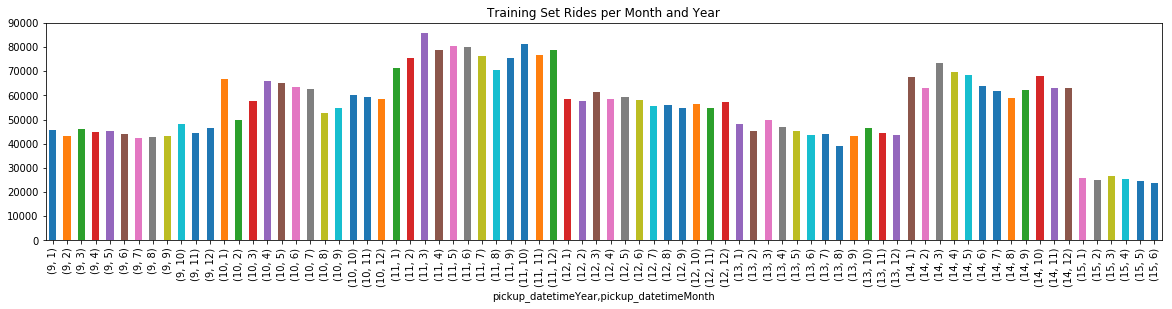

In [33]:
# v3_neighbours_04
new_list=csv_to_list('tmp/v3_neighbours_04.csv')
trimmed_df = train_df.iloc[new_list].copy()

plt.figure(figsize=(20, 4))
trimmed_df.simple_distance.groupby([trimmed_df.pickup_datetimeYear, trimmed_df.pickup_datetimeMonth]).count().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

In [ ]:
# v3_neighbours_03
new_list=csv_to_list('tmp/v3_neighbours_03.csv')
trimmed_df = train_df.iloc[new_list].copy()

plt.figure(figsize=(20, 4))
trimmed_df.simple_distance.groupby([trimmed_df.pickup_datetimeYear, trimmed_df.pickup_datetimeMonth]).count().plot(kind="bar")
plt.title('Training Set Rides per Month and Year')
plt.show()

# Save dataframes to be used directly

In [33]:
%%time
train_df = pd.read_feather('tmp/taxi-train-v3-chkpt4')

Wall time: 2.04 s


In [34]:
%%time
test_df = pd.read_feather('tmp/taxi-test-v3-chkpt4')

Wall time: 15.6 ms


In [35]:
# for training with validation
pruned_df = train_df.iloc[list_neighbours_no_maxmin]
val_df = train_df.iloc[list_min_dist_idx]

# for full traning with maybe 0.01 improvement
full_df = train_df.iloc[list_neighbours_no_max]

pruned_df.reset_index(drop=True, inplace=True)
full_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)

In [36]:
len(full_df), len(train_df), len(val_df), len(test_df)

(3454748, 54054206, 9674, 9914)

In [37]:
%%time
pruned_df.to_feather('tmp/taxi-v2-train')

Wall time: 141 ms


In [38]:
%%time
val_df.to_feather('tmp/taxi-v2-val')

Wall time: 11 ms


In [39]:
%%time
full_df.to_feather('tmp/taxi-v2-full')

Wall time: 218 ms


In [40]:
%%time
test_df.to_feather('tmp/taxi-test-v2')

Wall time: 20 ms


# Archive

In [20]:
# slower iterations using original dataframe
# %%time 

# list_neighbours = []
# length = len(test_df)

# thres_long = 0.005
# thres_lat = 0.005
# gps_not_found = []
# dt_not_found = []

# print(f"Location proximity {thres_long * 111000} meters")

# for i in range(10):
    
#     if (i%200==0): print(f"{(i+1):04}/{length}")

#     # same hour, same year, within 12 weeks apart
#     X_sub = train_df[(train_df.pickup_datetimeHour == test_df.iloc[i].pickup_datetimeHour)]  
#     X_sub = X_sub[(X_sub.pickup_datetimeYear == test_df.iloc[i].pickup_datetimeYear)]
#     X_sub = X_sub[(X_sub.pickup_datetimeWeek - test_df.iloc[i].pickup_datetimeWeek < 12)] 
    
#     # nearby pickup and dropoff locations
#     X_sub = X_sub[(abs(X_sub.pickup_longitude - test_df.iloc[i].pickup_longitude) < thres_long)]     
#     X_sub = X_sub[(abs(X_sub.pickup_latitude - test_df.iloc[i].pickup_latitude) < thres_lat)] 
#     X_sub = X_sub[(abs(X_sub.dropoff_longitude- test_df.iloc[i].dropoff_longitude) < thres_long)]
#     X_sub = X_sub[(abs(X_sub.dropoff_latitude - test_df.iloc[i].dropoff_latitude) < thres_lat)]
  
#     list_neighbours = list_neighbours + list(X_sub.index.values)
#     print(f'{i} {len(X_sub)}')

Location proximity 555.0 meters
0001/9914
0 301
1 45
2 1033
3 1106
4 42
5 460
6 962
7 104
8 243
9 366
Wall time: 4.36 s
